In [2]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
#!pip install pyLDAvis
#import pyLDAvis
#import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data= pd.read_csv("Google.csv",  sep = ";")
data.head()


,age,gender,humanmade,concern,efficacy,income,edu3,openanswer,translation
0,5,2,1,1.00,0.333333,400000,3,Å være miljø vennlig,Being environmentally friendly
1,4,1,0,0.50,0.333333,600000,2,å så?har altid vært klimaendring,to sow? has always been climate change
2,4,1,1,0.75,0.333333,500000,3,Å stange hodet mot veggen,To bumping your head against the wall
3,4,2,1,1.00,0.333333,0,3,å nei ikke igjen - gjør noe med det - NÅ,oh no not again - do something about it - NOW
4,2,2,1,0.75,0.333333,0,2,Ønsker ikke at klima skal endres,Do not want that climate change will


In [5]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [6]:
import nltk
nltk.download('stopwords') # run this one time



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
data.dropna(axis = 0, how ='any',inplace=True) 

data['translation'] = data['translation'].apply(clean_text)
data['Num_words_text'] = data['translation'].apply(lambda x:len(str(x).split())) 

data.head()
#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

,age,gender,humanmade,concern,efficacy,income,edu3,openanswer,translation,Num_words_text
0,5,2,1,1.00,0.333333,400000,3,Å være miljø vennlig,being environmentally friendly,3
1,4,1,0,0.50,0.333333,600000,2,å så?har altid vært klimaendring,always been climate change,4
2,4,1,1,0.75,0.333333,500000,3,Å stange hodet mot veggen,bumping your head against wall,5
3,4,2,1,1.00,0.333333,0,3,å nei ikke igjen - gjør noe med det - NÅ,again something about,3
4,2,2,1,0.75,0.333333,0,2,Ønsker ikke at klima skal endres,want that climate change will,5


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
data['translation']= data['translation'].apply(remove_stopwords)

In [13]:
import en_core_web_sm
nlp = en_core_web_sm.load()


def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [15]:
text_list=data['translation'].tolist()
print(text_list[1])
tokenized = lemmatization(text_list)
print(tokenized[1])

always climate change
['climate', 'change']


In [16]:
dictionary = corpora.Dictionary(tokenized)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized]



In [27]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=13, random_state=100,
                chunksize=1000, passes=50,iterations=100)



In [28]:
lda_model.print_topics()

[(0,
  '0.057*"future" + 0.054*"long" + 0.042*"climate" + 0.040*"society" + 0.037*"term" + 0.032*"generation" + 0.032*"measure" + 0.031*"environmental" + 0.028*"scary" + 0.023*"possible"'),
 (1,
  '0.044*"environment" + 0.034*"country" + 0.026*"money" + 0.019*"energy" + 0.018*"people" + 0.016*"much" + 0.016*"product" + 0.016*"wetter" + 0.016*"emission" + 0.015*"reason"'),
 (2,
  '0.211*"change" + 0.175*"climate" + 0.050*"time" + 0.035*"natural" + 0.028*"emission" + 0.019*"poor" + 0.018*"earth" + 0.018*"people" + 0.017*"snow" + 0.016*"contamination"'),
 (3,
  '0.041*"serious" + 0.039*"nature" + 0.038*"climate" + 0.038*"natural" + 0.037*"population" + 0.032*"little" + 0.031*"year" + 0.030*"cycle" + 0.029*"human" + 0.026*"change"'),
 (4,
  '0.060*"part" + 0.040*"issue" + 0.039*"polar" + 0.037*"problem" + 0.036*"health" + 0.035*"large" + 0.035*"impact" + 0.033*"consequence" + 0.029*"welfare" + 0.029*"food"'),
 (5,
  '0.078*"climate" + 0.052*"change" + 0.039*"pollution" + 0.035*"negative" +

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized, start=2, limit=50, step=1)

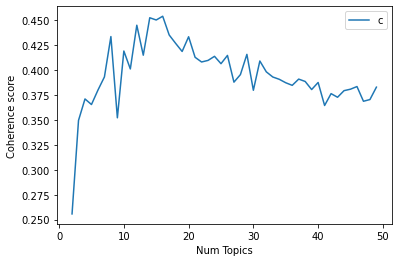

In [26]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores